주성분 분석은 다차원 데이터를 분류하기 위해 사용된다.

다차원 데이터는 변수를 여러개 가진 데이터를 의미한다.

예시로는 seaborn 패키지에 있는 'penguins' 데이터를 활용할 것이다.

**0\. 필요 패키지 불러오기**

```
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import make_pipeline
```

**1\. 데이터 전처리**

```
pg = sns.load_dataset('penguins')

# 필요항목만 선택하기
pg_select = pg[['species','bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

# NaN 포함 열 제거하기
pg_select = pg_select.dropna(axis=0)

# 숫자값만 가진 데이터와 그외 데이터 분리
pg_filt = pg_select.select_dtypes(np.number)
pg_spc = pg_select.select_dtypes(exclude='float')
species = pg_spc.species.tolist()

```

PCA에서는 주성분으로 숫자 데이터밖에 활용하지 못한다.

따라서 숫자 데이터만을 따로 추출해야 한다.

penguins 데이터에서는 부리의 길이과 너비, 날개의 길이, 그리고 질량에 해당한다.

숫자 데이터 뿐만 아니라 종에 대한 데이터도 꼭 저장해야 한다.

결국에 펭귄의 종을 분류하려는 것이 목적이기 때문이다.

**2\. 주성분 분석하기 (PCA)**

```
# 주성분 뽑아내기
pca_4 = PCA(n_components=4)
pg_filt_scaled = StandardScaler().fit_transform(pg_filt)
pg_pc_4_scaled = pca_4.fit_transform(pg_filt_scaled)

per_var = np.round(pca_4.explained_variance_ratio_*100, decimals=1)
labels = ['PC'+str(x) for x in range(1, len(per_var)+1)]
x = list(range(1, len(per_var)+1))

# 누적 % of Explained Variance
cum_per_var = []
cum = 0
for i in range(len(per_var)):
  cum += per_var[i]
  cum = round(cum, 3)
  cum_per_var.append(cum)

# 그래프 그리기
plt.title('Scree Plot 2')
plt.bar(x=range(1, len(per_var)+1), height=cum_per_var, tick_label=labels)
plt.xlabel('Principal Component')
plt.ylabel('Cum % of Explained Variance')

for i, v in enumerate(x):
    plt.text(v, cum_per_var[i], cum_per_var[i],            
             fontsize = 9, 
             color='blue',
             horizontalalignment='center', 
             verticalalignment='bottom') 

plt.show()
```

우선 주성분이 몇개가 필요할지에 대해 분석을 진행했다.

주성분이 2개만으로도 설명력이 높은 것이 가장 좋다.

2차원 그래프로 그림을 그릴 수 있어 편리하기 때문이다.

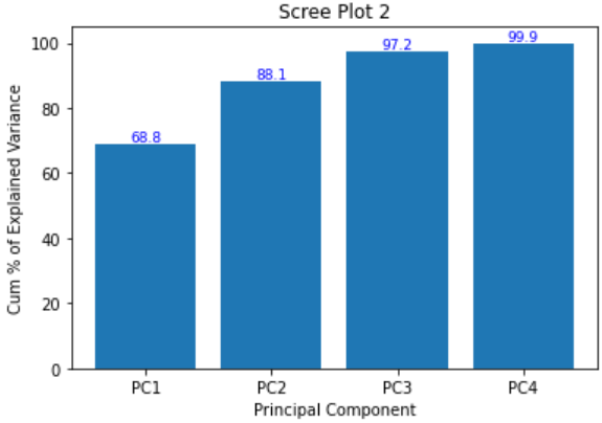

주성분의 설명력은 위 그래프와 같다.

주성분을 2개를 쓸 때는 설명력이 총 88.1%이고

주성분을 3개를 쓰면 설명력이 97.2%가 된다.

**3\. 주성분 분석 시각화하기**

**i) 주성분 2개**

\* 코드

```
# Standardized 2차원 PCA
pca = PCA(n_components=2)
pg_filt_scaled = StandardScaler().fit_transform(pg_filt)
pg_pc_scaled = pca.fit_transform(pg_filt_scaled)

# 데이터프레임 생성
pc_scaled_df = pd.DataFrame(data = pg_pc_scaled, columns = ['PC1', 'PC2'])
pc_scaled_df['Species'] = species

# 그래프 생성
sns.scatterplot(data=pc_scaled_df,x='PC1',y='PC2', hue='Species')
plt.show()
ratio = pca.explained_variance_ratio_.sum()
```

_\* 그래프_

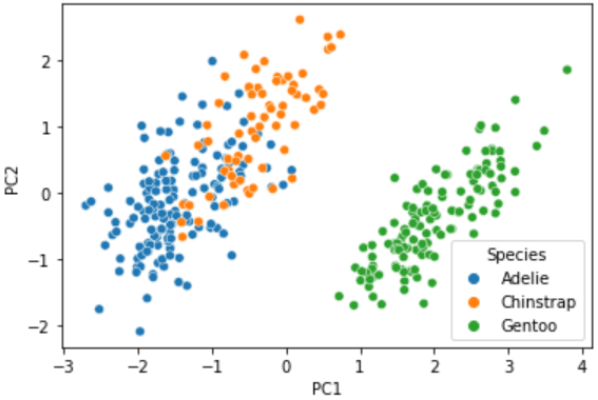

주성분 2개만으로도 3가지 종이 비교적 잘 나누어졌다.

하지만 여전히 주황색과 파랑색이 겹쳐져있다.

이따가 3차원 분석에서 겹친 부분은 해결이 된다.

_\* 구성성분_

```
# PC의 구성요소 보기
comp_df = pd.DataFrame(data = pca.components_, index = ['PC1', 'PC2'], columns=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])
print(comp_df)
```

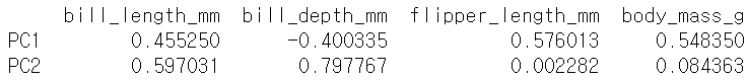

PC1은 날개의 길이와 상관관계가 가장 높다.

부리의 길이, 날개의 길이, 그리고 몸무게와 양의 상관관계를 갖고

부리의 넓이와는 음의 상관관계를 갖는다.

PC2는 부리의 넓이와 상관관계가 가장 높다.

그리고 날개의 길이와 가장 상관관계가 낮다.

**i) 주성분 3개**

_\* 코드_

```
## Standardized 3차원 PCA
pca = PCA(n_components=3)
pg_filt_scaled = StandardScaler().fit_transform(pg_filt)
pg_3D_scaled = pca.fit_transform(pg_filt_scaled)

## 데이터프레임 생성
pg_3D_df = pd.DataFrame(data = pg_3D_scaled, columns = ['PC1', 'PC2', 'PC3'])
pg_3D_df['Species'] = species

## 시각화하기
from mpl_toolkits.mplot3d import Axes3D

# 배경 깔기
fig2 = plt.figure(figsize=(8,8))
ax2 = fig2.add_subplot(111, projection='3d')

# 라벨링
ax2.set_xlabel('Principal Component 1', fontsize = 15)
ax2.set_ylabel('Principal Component 2', fontsize = 15)
ax2.set_zlabel('Principal Component 3', fontsize = 15)
ax2.set_title('3 Component PCA', fontsize = 20)

# 실제 그래프
labels = ['Adelie', 'Chinstrap', 'Gentoo']

for label in labels:
  indicesToKeep = pg_3D_df['Species'] == label
  ax2.scatter(pg_3D_df.loc[indicesToKeep, 'PC1']
            , pg_3D_df.loc[indicesToKeep, 'PC2']
            , pg_3D_df.loc[indicesToKeep, 'PC3']
            , s = 30)
            
# 범례
ax2.legend(labels)
```

_\* 그래프_

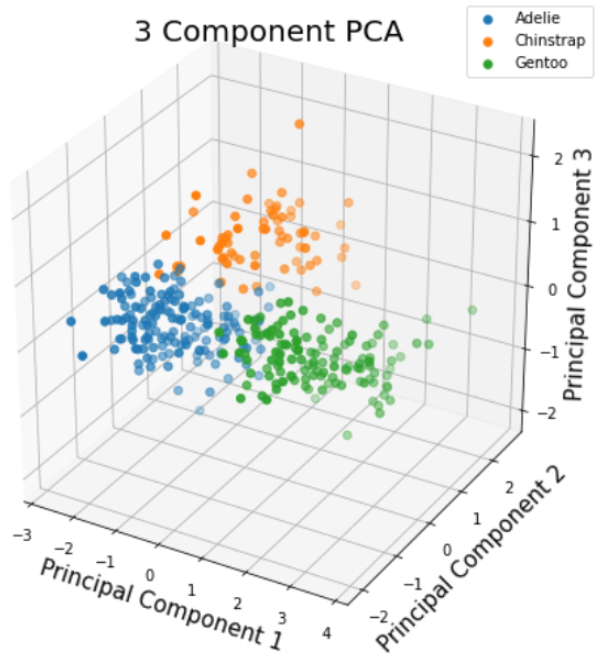

2차원 분석에서는 파랑색과 주황색이 겹쳐있는 부분이 있었다.

3차원으로 분석을 고도화하니 겹쳐있던 부분들도 분리가 되었다.

설명력이 88.1%에서 97.2%로 오른 덕택이다.

_\* 구성성분_

```
# PC의 구성요소 보기
comp_df = pd.DataFrame(data = pca.components_, index = ['PC1', 'PC2','PC3'], columns=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])
print(comp_df)
```

PCA를 통해 얻은 주성분은 하나의 특성이 아니다.

기존의 차원을 압축시킨 것이므로 하나의 주성분에 여러 특성이 뭉쳐져있다.

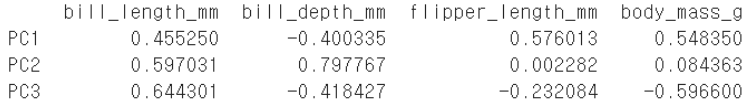

PC1과 PC2에 대한 분석은 2차원 PCA에서 한 것과 동일하다.

PC3만 추가적으로 설명하겠다.

PC3는 부리의 길이와 상관관계가 가장 높다.

부리의 넓이, 날개의 길이, 그리고 몸무게와 음의 상관관계를 갖고

부리의 길이와는 양의 상관관계를 갖는다.

모두 행복하길

\-끝-